In [2]:
import sys
import os
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(project_root)


import utils.NN_building as NN_building
import src.NN_pipeline as NN_pipeline   
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
import pdb
import matplotlib.pyplot as plt 



def plot_mi_feature(data, target, other_features,type):

    # Mutual information between variables and zero_perc
    if type == 'classification':
        mi = mutual_info_classif(data[other_features], data[target], random_state=0)
    elif type == 'regression':
        mi = mutual_info_regression(data[other_features], data[target], random_state=0)
    mi_df = pd.DataFrame({'feature': other_features, 'mi': mi})
    mi_df = mi_df.sort_values('mi', ascending=False).reset_index(drop=True)   

    # Plot mutual information
    plt.figure(figsize=(20,5))
    plt.bar(mi_df['feature'],mi_df['mi'])
    plt.xticks(rotation=90)
    plt.show()
    return mi_df

### Classification of presence

#### Ntrap = 10, lags = 5  

In [3]:
# Model parameters

parameters = {
    'ntraps': 10,
    'lags': 5,
    'model_type': 'logistic_3c',   
    'use_trap_info': True,
    'add_constant': True,
    'scale': True,
    'cylindrical_input': True,
    'split_type': 'year',
    'bool_input': False,
    'truncate_100': False,
    'year_list_train': ['2011_12', '2012_13', '2013_14', '2014_15', '2015_16', '2016_17', '2017_18', '2018_19', '2019_20', '2020_21', '2021_22'],
    'year_list_test': ['2022_23', '2023_24', '2024_25'],
    'month_experiment': False,
    'input_3d': False,
    'all_cols': True

    }


data_path = f"../results/final_dfs/final_df_lag{parameters['lags']}_ntraps{parameters['ntraps']}.parquet"

data = pd.read_parquet(data_path)
unnamed_cols = data.columns [['Unnamed' in col for col in data.columns] ] #TODO create function to load data
data.drop(unnamed_cols,axis=1,inplace = True)

x_train, x_test, y_train, y_test, index_dict= NN_pipeline.create_dataset(parameters, data_path=data_path)



In [14]:
# Calculate mutual information
mi = mutual_info_classif(x_train, y_train, random_state=0)
mutual_info_df = pd.DataFrame({'feature': x_train.columns, 'mi': mi})
mutual_info_df = mutual_info_df.sort_values('mi', ascending=False).reset_index(drop=True)   


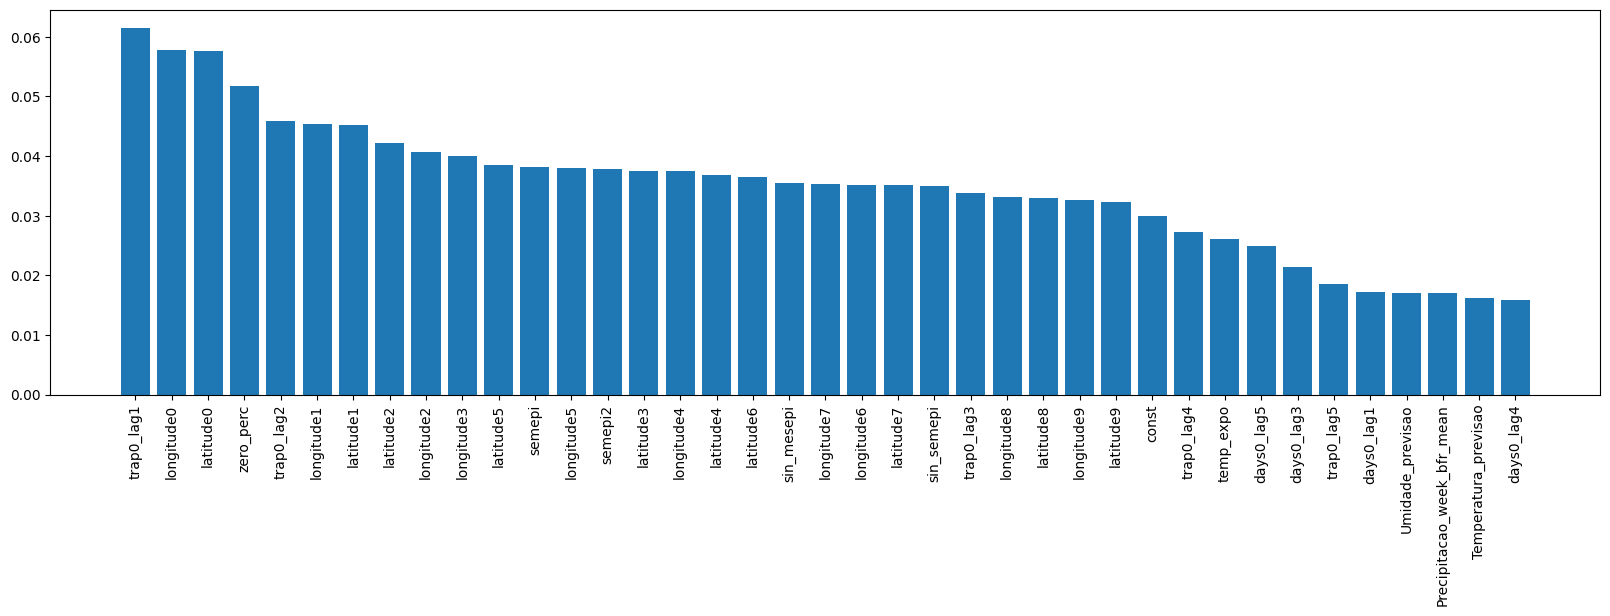

In [12]:
# Plot mutual information
plt.figure(figsize=(20,5))
plt.bar(mutual_info_df['feature'].iloc[1:40], mutual_info_df['mi'].iloc[1:40])
plt.xticks(rotation=90)
plt.show()


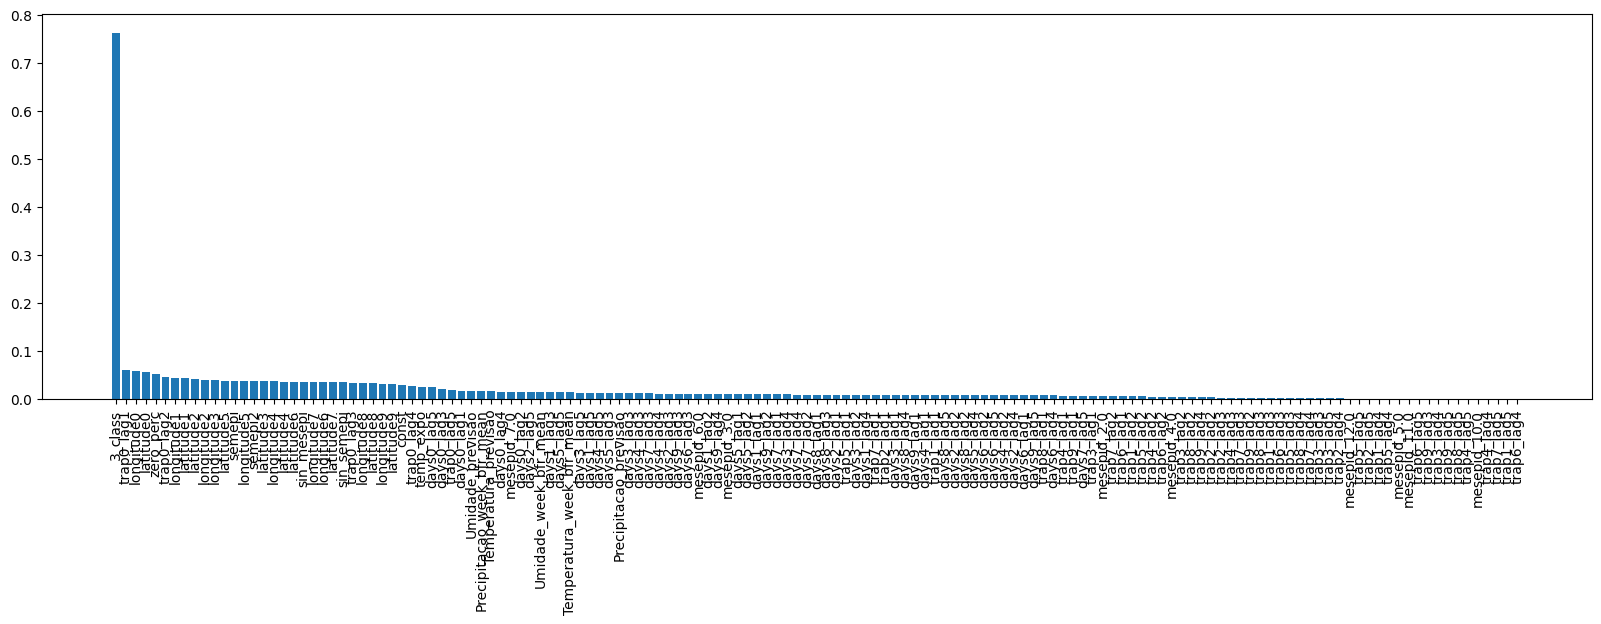

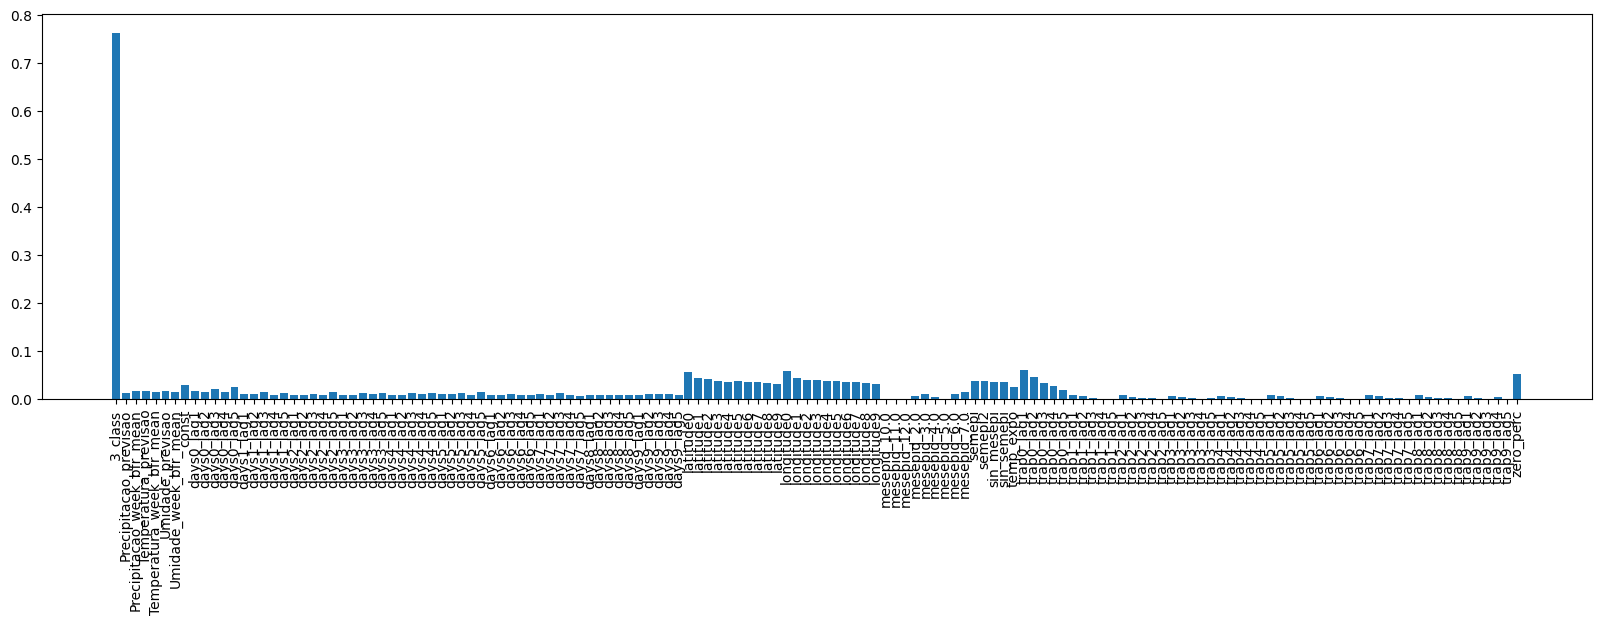

In [ ]:
# Plot mutual information
plt.figure(figsize=(20,5))
plt.bar(mutual_info_df['feature'].iloc[1:40],mutual_info_df['mi'].iloc[1:40])
plt.xticks(rotation=90)
plt.show()


mutual_info_df.sort_values('feature', inplace=True)
# Plot mutual information
plt.figure(figsize=(20,5))
plt.bar(mutual_info_df['feature'].iloc[1:40],mutual_info_df['mi'].iloc[1:40])
plt.xticks(rotation=90)
plt.show()

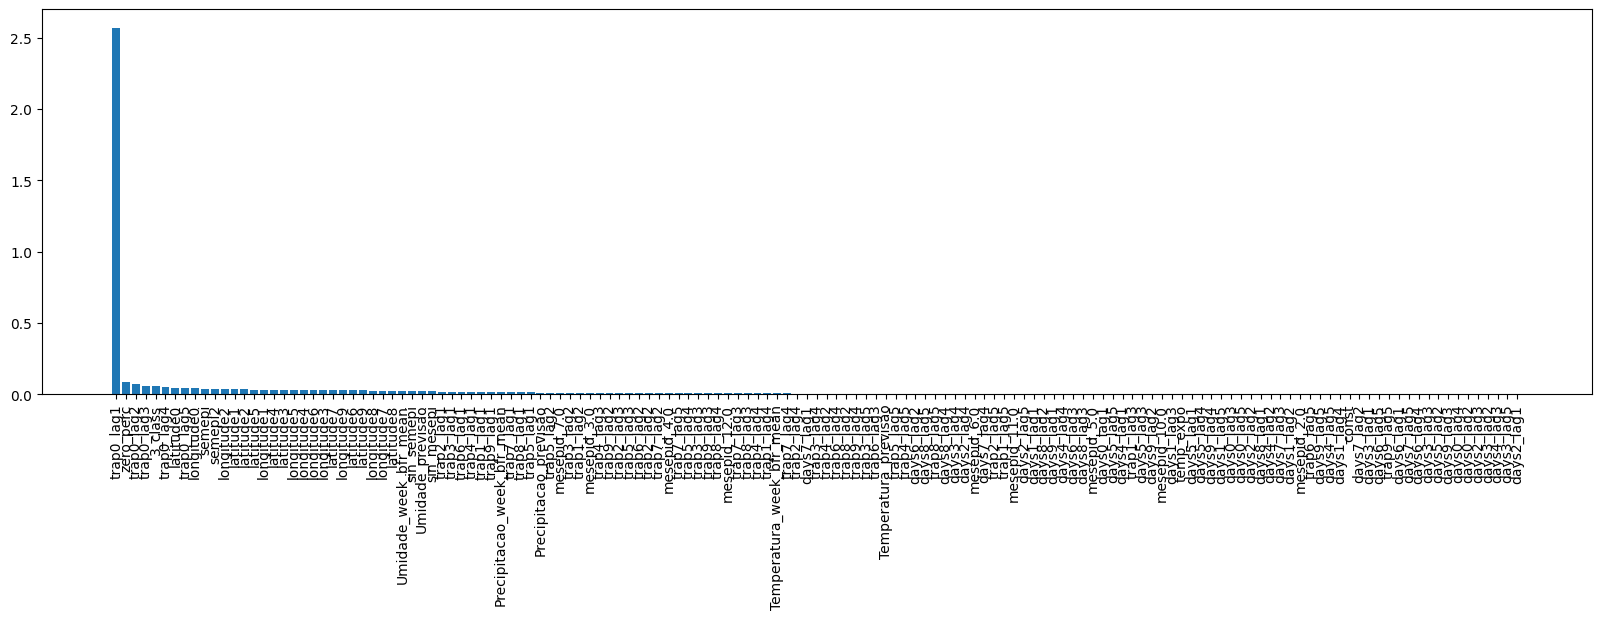

In [16]:
mi_trap0_lag14_df = plot_mi_feature(x_train, 'trap0_lag1', mutual_info_df['feature'].to_list(),'regression')


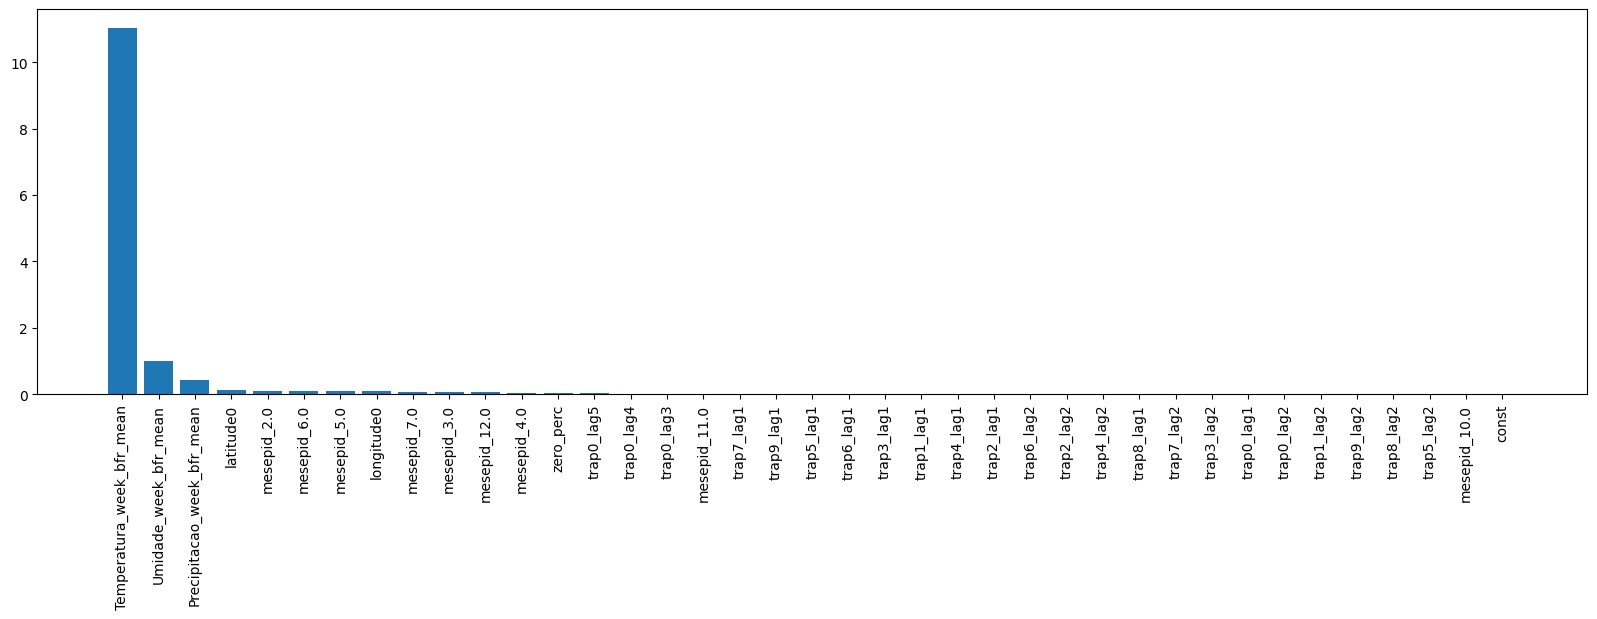

In [20]:
mi_trap0_lag14_df = plot_mi_feature(x_train, 'Temperatura_week_bfr_mean', mutual_info_df['feature'].to_list(),'regression')

In [26]:
x_train.iloc[:,-13:]

,zero_perc,Temperatura_week_bfr_mean,Precipitacao_week_bfr_mean,Umidade_week_bfr_mean,mesepid_2.0,mesepid_3.0,mesepid_4.0,mesepid_5.0,mesepid_6.0,mesepid_7.0,mesepid_10.0,mesepid_11.0,mesepid_12.0
0,1.000000,0.733547,0.311441,0.865878,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.800000,0.734820,0.323330,0.866746,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.800000,0.733907,0.314755,0.866144,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.800000,0.733503,0.311190,0.865973,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.000000,0.733884,0.314682,0.866237,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219952,0.593023,0.636081,0.000016,0.734723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
219953,0.643443,0.636480,0.000015,0.734498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
219954,0.491329,0.636184,0.000016,0.734488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
219955,0.594262,0.636147,0.000015,0.734913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
